In [1]:
import os
import sys
import random
import pandas as pd
import numpy as np
from scipy.linalg import toeplitz
from copy import copy
# import hypertools as hyp
import matplotlib.pyplot as plt

# Geniuses that worked on hypertools did not update certain package and thus it produces warnings (they break jupyter lab)
import warnings
warnings.filterwarnings("ignore")

# Comment out if you don't want to see all of the values being printed (i.e. default)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

current_dir = os.getcwd()
# utils_path = os.path.join(current_dir, '..', 'utils')
utils_path = os.path.join(current_dir, '../')
utils_abs_path = os.path.abspath(utils_path)
if utils_abs_path not in sys.path:
    sys.path.append(utils_abs_path)

import utils.get_data as get_data
# from impute_methods import *
from utils.impute_methods import impute_linear_interpolation

DATA_PATH = get_data.get_dataset_abspath()

training_setA_path = DATA_PATH + 'training_setA'
training_setB_path = DATA_PATH + 'training_setB'

In [2]:
dataset, column_names = get_data.get_dataset_as_np(files=100)

Loading dataset...


100%|██████████| 100/100 [00:00<00:00, 170.09it/s]

Done.


In [32]:
print("Number of NaN values for each column of the dataset.")

nan_counts = np.sum(np.isnan(dataset), axis=0)

pairs = list(zip(column_names, nan_counts))
sorted_nan_counts = sorted(pairs, key=lambda x: sorted(x[1]))
sorted_column_names = [pair[0] for pair in nan_counts]

nan_percentages = np.round(nan_counts/dataset.shape[0] * 100, 2)

# Print the NaN counts of each column
for index, (nan_count, column_name)  in enumerate(zip(nan_counts, column_names)):
    print(f"{column_name}: {nan_count}/{dataset.shape[0]} ({nan_percentages[index]}%)")

Number of NaN values for each column of the dataset.


TypeError: 'numpy.str_' object cannot be interpreted as an integer

Text(0.5, 1.0, 'Percentage of values NaN for each column of the dataset')

Text(0, 0.5, 'Percentage')

<BarContainer object of 41 artists>

AttributeError: 'Figure' object has no attribute 'plot'

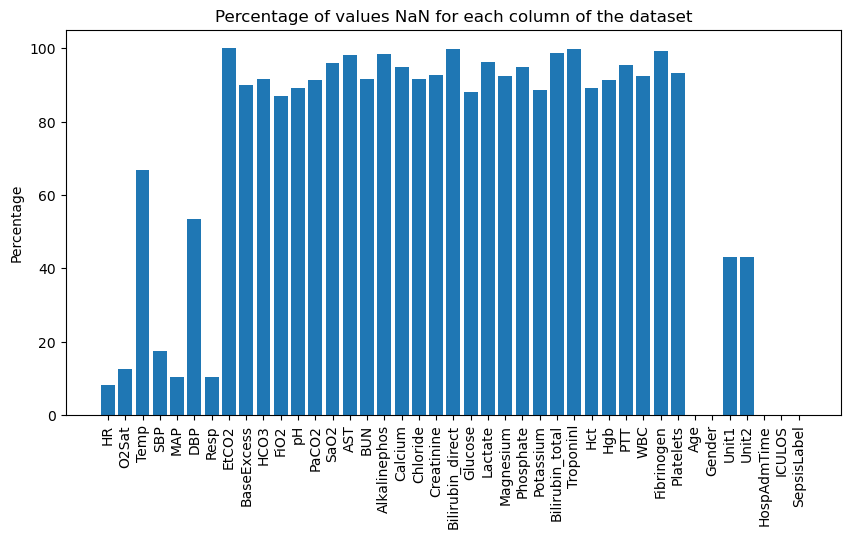

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("Percentage of values NaN for each column of the dataset")
ax.set_ylabel("Percentage")
ax.bar(column_names, nan_percentages)
ax.tick_params(axis='x', labelrotation=90)
fig.plot()

In [9]:
heading = "Training Set A".ljust(70) + "Training Set B" +\
          "\n" + "Column".ljust(16) + "num of NaN" + "  total" + "  Percentage".ljust(31) +\
                 "Column".ljust(16) + "num of NaN" + "  total" + "  Percentage " +\
          "\n" + "_"*109
print(heading)

# Iterate through the dictionary and print the required format
for itemsA, itemsB in zip(nan_countsA.items(), nan_countsB.items()):
    columnA, countsA = itemsA[0], itemsA[1]
    columnB, countsB = itemsB[0], itemsB[1]
    nan_countA = countsA["nan"]
    total_countA = countsA["total"]
    percentage = (nan_countA / total_countA) * 100 if total_countA else 0
    outputA = f"{columnA}:".ljust(17) + f" {nan_countA} ".rjust(10) + f"/ {total_countA}".ljust(10) + f"{percentage:6.2f}%"

    nan_countB = countsB["nan"]
    total_countB = countsB["total"]
    percentage = (nan_countB / total_countB) * 100 if total_countB else 0
    outputB = f"{columnB}:".ljust(17) + f" {nan_countB} ".rjust(10) + f"/ {total_countB}".ljust(10) + f"{percentage:6.2f}%"
    
    print(outputA + "|".rjust(20) + outputB)

Training Set A                                                        Training Set B
Column          num of NaN  total  Percentage                   Column          num of NaN  total  Percentage 
_____________________________________________________________________________________________________________


NameError: name 'nan_countsA' is not defined

TypeError: 'module' object is not callable

In [5]:
# Let us look at a random specific patient file

# Change to empty strign to get random file
specific_filename = "p001146.psv"

# From training set A
file_path = random.choice(os.listdir(training_setA_path)) if specific_filename == "" else specific_filename
file_data = pd.read_csv(training_setA_path + "/" + file_path, sep='|')
print(file_path)
print(file_data['HR'])

p001146.psv
0     88.0
1     76.0
2     72.0
3     81.0
4      NaN
5     94.0
6     80.0
7     88.0
8     78.0
9     80.0
10    86.0
11    86.0
12     NaN
13     NaN
14    75.0
15    69.0
16     NaN
17    85.0
18    83.0
19    84.0
20    73.0
21    73.0
22     NaN
23    97.0
Name: HR, dtype: float64


In [7]:
# This linearly interpolates the Heart Rate values which could be sufficient
imputed_data = impute_linear_interpolation(file_data, 'HR')

print(imputed_data['HR'])

0     88.000000
1     76.000000
2     72.000000
3     81.000000
4     87.500000
5     94.000000
6     80.000000
7     88.000000
8     78.000000
9     80.000000
10    86.000000
11    86.000000
12    82.333333
13    78.666667
14    75.000000
15    69.000000
16    77.000000
17    85.000000
18    83.000000
19    84.000000
20    73.000000
21    73.000000
22    85.000000
23    97.000000
Name: HR, dtype: float64
